In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import copy

In [2]:
def load_dataset():
    train_dataset = h5py.File('./datasets/catvnoncat/train_catvnoncat.h5', 'r')
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])
    
    test_dataset = h5py.File('./datasets/catvnoncat/test_catvnoncat.h5', 'r')
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])
    
    classes = np.array(test_dataset['list_classes'][:])
    
    return train_x, train_y, test_x, test_y, classes

In [3]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [4]:
def initialize_params(dims):
    w = np.zeros((dims,1))
    b = 0.
    return w, b

In [79]:
def propagate(w, b, train_X, train_Y, test_X, test_Y):
    m = train_X.shape[1]
    A = sigmoid(w.T.dot(train_X) + b)
    cost = -(1/m)*np.sum(train_Y*np.log(A)+(1-train_Y)*np.log(1-A))
    train_acc = 100 - np.mean(np.abs(predict(w,b,train_X)-train_Y)*100)
    test_acc = 100 - np.mean(np.abs(predict(w,b,test_X)-test_Y)*100)
    
    dw = (1/m)*train_X.dot((A-train_Y).T)
    db = (1/m)*np.sum(A-train_Y)
    assert(dw.shape == (w.shape[0], 1))
    assert(db.shape == ())
    
    grads = {
        "dw": dw,
        "db": db
    }
    return grads, cost, train_acc, test_acc

In [77]:
def optimize(w, b, train_X, train_Y, test_X, test_Y, epochs=1000, learning_rate=0.009, print_cost=False):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    costs = []
    train_accs = []
    test_accs = []
    
    for i in range(epochs):
        grads, cost, train_acc, test_acc = propagate(w, b, train_X, train_Y, test_X, test_Y)
        dw = grads['dw']
        db = grads['db']
        w = w - learning_rate*grads['dw']
        b = b - learning_rate*grads['db']
        costs.append(cost)
        train_accs.append(train_acc)
        test_accs.append(test_acc)
        if print_cost and i % 100 == 0:
            print("Cost after epoch {}: {}".format(i, cost))
    
    params = {
        "w": w,
        "b": b
    }
    
    grads = {
        "dw": dw,
        "db": db
    }
    return params, grads, costs, train_accs, test_accs

In [40]:
def predict(w, b, X):
    m = X.shape[1]
    Y_pred = np.zeros((1,m))
    
    A = sigmoid(w.T.dot(X)+b)
    
    for i in range(m):
        if A[0,i] > 0.5:
            Y_pred[0,i] = 1
        else:
            Y_pred[0,i] = 0
            
    return Y_pred

In [84]:
def model(X_train, Y_train, X_test, Y_test, epochs=2000, learning_rate=0.001, print_cost=False):
    m_train = X_train.shape[1]
    m_test = X_test.shape[1]
    
    w, b = initialize_params(X_train.shape[0])
    params, grads, costs, train_accs, test_accs = optimize(w, b, X_train, Y_train, X_test, Y_test, epochs=epochs, learning_rate=learning_rate, print_cost=print_cost)
    w = params['w']
    b = params['b']
    
    
    plt.figure(1)
    plt.plot(np.arange(0,epochs), costs, label=learning_rate)
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    plt.legend(title='learning_rate')
    
    plt.figure(2)
    plt.ylim([0,100])
    plt.plot(np.arange(0,epochs), train_accs, label=learning_rate)
    plt.xlabel('epoch')
    plt.ylabel('Train Accuracy(%)')
    plt.legend(title='learning_rate')
    
    plt.figure(3)
    plt.ylim([0,100])
    plt.plot(np.arange(0,epochs), test_accs, label=learning_rate)
    plt.xlabel('epoch')
    plt.ylabel('Test Accuracy(%)')
    plt.legend(title='learning_rate')
    
    d = {
        "costs": costs,
        "train_accs": train_accs,
        "test_accs": test_accs,
        "w": w,
        "b": b
    }
    
    return d
    

In [42]:
epochs = 10000
learning_rate = 0.009

In [43]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_dataset()

In [44]:
m_train = train_x_orig.shape[0]
m_test = test_x_orig.shape[0]

In [45]:
train_x, test_x = train_x_orig.reshape((m_train,-1)).T, test_x_orig.reshape((m_test,-1)).T
train_x, test_x = train_x/255, test_x/255

In [46]:
w, b = initialize_params(train_x.shape[0])

Training w/ learning rate: 0.01
Train Accuracy: 100.0%
Test Accuracy: 72.0%
Training w/ learning rate: 0.001
Train Accuracy: 99.04306220095694%
Test Accuracy: 70.0%
Training w/ learning rate: 0.0001
Train Accuracy: 86.60287081339713%
Test Accuracy: 62.0%


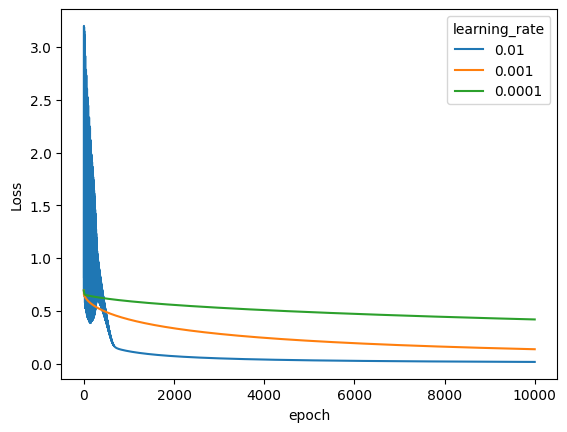

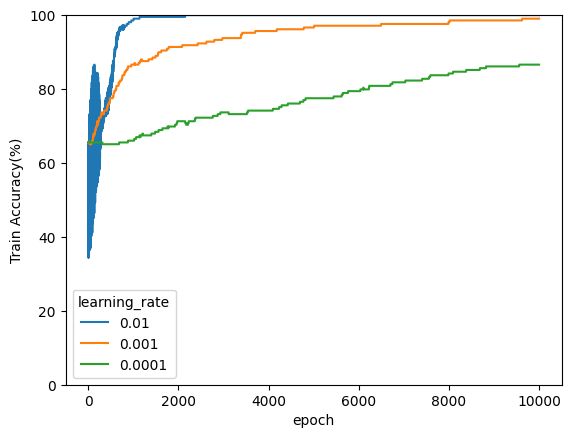

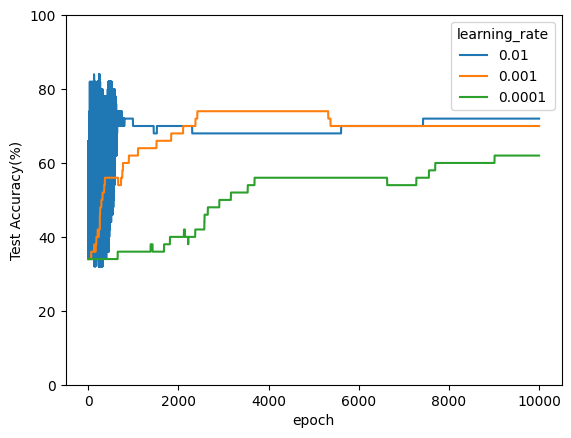

In [87]:
for rate in [0.01, 0.001, 0.0001]:
    print("Training w/ learning rate: {}".format(rate))
    d = model(train_x, train_y, test_x, test_y, learning_rate=rate, epochs=epochs)
    print("Train Accuracy: {}%".format(d["train_accs"][-1]))
    print("Test Accuracy: {}%".format(d["test_accs"][-1]))


plt.show()
